# Toy example of a two-dimensional data set in the input and feature space (fig. 4.1)
## Author: Alexander Gresch

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path_to_colors = "../colors/"

In [3]:
# Import custom font
import matplotlib.font_manager as fm

path = r'../fonts/Hero New Regular.otf' # for text only
#path = r'your-path\fonts\Hero New Medium.otf' # for (a), (b), etc.
custom_font = fm.FontProperties(fname=path)

In [4]:
# Import colors (e.g., as 1D and dictionary)
import pickle

# Use colors as a dictionary
infile = open(path_to_colors+'colors_dict.pkl','rb')
colors_dict = pickle.load(infile)
infile.close()

# Import 1D array of colors
infile = open(path_to_colors+'colors_1D.pkl','rb')
colors_1D = pickle.load(infile)
infile.close()


In [5]:
# derandomized data generation
N = 100
r = np.random.RandomState(42)
radii = np.zeros((2,N))
for i,rrange in enumerate(([0.1,0.8],[1.2,1.9])):
    radii[i] = r.uniform(*rrange,size=N)
angles  = r.uniform(0,2*np.pi,size=(2,N))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

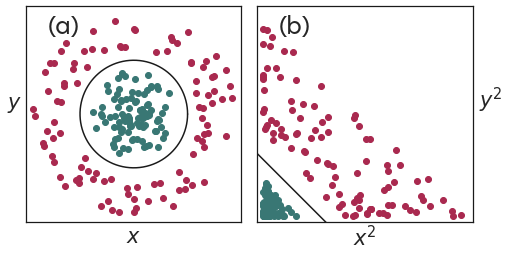

In [41]:
# Seaborn style set
sns.set(style="whitegrid", rc={'figure.figsize':(8,6)}) # in inches
sns.set_style("whitegrid", {'grid.linestyle': 'dashed', "grid.color": "0.5", 'axes.edgecolor': '.1'})

ax = plt.subplot(121)
for color,radius,angle in zip(colors_dict.values(),radii,angles):
    plt.scatter(radius*np.cos(angle),radius*np.sin(angle),c=color["dark"])
angle = np.linspace(0,2*np.pi,100)
plt.plot(np.cos(angle),np.sin(angle),"k-")
plt.xlim(-2,2)
plt.xlabel("$x$",fontsize="xx-large",fontproperties=custom_font)
plt.xticks([])
plt.ylim(-2,2)
plt.ylabel("$y$",fontsize="xx-large",fontproperties=custom_font,rotation=0,ha="right")
plt.text(0.1,0.875,"(a)",fontsize=24,fontproperties=custom_font,transform=ax.transAxes)
plt.yticks([])
plt.gca().set_aspect('equal')

ax = plt.subplot(122)
for color,radius,angle in zip(colors_dict.values(),radii**2,angles):
    plt.scatter(radius*np.cos(angle)**2,radius*np.sin(angle)**2,c=color["dark"])
plt.plot([-1,2],[2,-1],"k-")
plt.xlim(-0.1,1.9**2+0.1)
plt.xlabel("$x^2$",fontsize="xx-large",fontproperties=custom_font)
plt.xticks([])
plt.ylim(-0.1,1.9**2+0.1)
plt.ylabel("$y^2$",fontsize="xx-large",fontproperties=custom_font,rotation=0,ha="right",labelpad=-245)
plt.text(0.1,0.875,"(b)",fontsize=24,fontproperties=custom_font,transform=ax.transAxes)
plt.yticks([])
plt.gca().set_aspect('equal')
plt.subplots_adjust(wspace=0.075)
plt.savefig("4.1_toy_example.pdf",orientation="landscape",dpi=600,bbox_inches="tight")